In [1]:
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import nltk

In [2]:
import os
nltk.data.path.append('/root/nltk_data') 

In [3]:
data=pd.read_csv('../../csv/Phishing_Email.csv')
data

,Unnamed: 0,Email Text,Email Type
0,0,"re : 6 . 1100 , disc : uniformitarianism , re ...",Safe Email
1,1,the other side of * galicismos * * galicismo *...,Safe Email
2,2,re : equistar deal tickets are you still avail...,Safe Email
3,3,\nHello I am your hot lil horny toy.\n I am...,Phishing Email
4,4,software at incredibly low prices ( 86 % lower...,Phishing Email
...,...,...,...
18645,18646,date a lonely housewife always wanted to date ...,Phishing Email
18646,18647,request submitted : access request for anita ....,Safe Email
18647,18648,"re : important - prc mtg hi dorn & john , as y...",Safe Email
18648,18649,press clippings - letter on californian utilit...,Safe Email


In [4]:
data['Email Text'].replace('empty',np.nan,inplace=True)

C:\Users\romai\AppData\Local\Temp\ipykernel_31088\3972160757.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['Email Text'].replace('empty',np.nan,inplace=True)


In [5]:
data.isna().sum()/data.shape[0]*100

Unnamed: 0    0.0000
Email Text    2.9437
Email Type    0.0000
dtype: float64

In [6]:
freq=data['Email Text'].mode()[0]

In [7]:
data

,Unnamed: 0,Email Text,Email Type
0,0,"re : 6 . 1100 , disc : uniformitarianism , re ...",Safe Email
1,1,the other side of * galicismos * * galicismo *...,Safe Email
2,2,re : equistar deal tickets are you still avail...,Safe Email
3,3,\nHello I am your hot lil horny toy.\n I am...,Phishing Email
4,4,software at incredibly low prices ( 86 % lower...,Phishing Email
...,...,...,...
18645,18646,date a lonely housewife always wanted to date ...,Phishing Email
18646,18647,request submitted : access request for anita ....,Safe Email
18647,18648,"re : important - prc mtg hi dorn & john , as y...",Safe Email
18648,18649,press clippings - letter on californian utilit...,Safe Email


In [8]:
data['Email Text']=data['Email Text'].fillna(freq)
data.isnull().sum()

Unnamed: 0    0
Email Text    0
Email Type    0
dtype: int64

In [9]:
data.describe(include='all').T


,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Unnamed: 0,18650.0,NaN,NaN,NaN,9325.154477,5384.327293,0.0,4662.25,9325.5,13987.75,18650.0
Email Text,18650,17536,calpine daily gas nomination > ricky a . arche...,558,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Email Type,18650,2,Safe Email,11322,NaN,NaN,NaN,NaN,NaN,NaN,NaN


C:\Users\romai\AppData\Local\Temp\ipykernel_31088\873913219.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data,x='Email Type', palette='Set2')


<Axes: xlabel='Email Type', ylabel='count'>

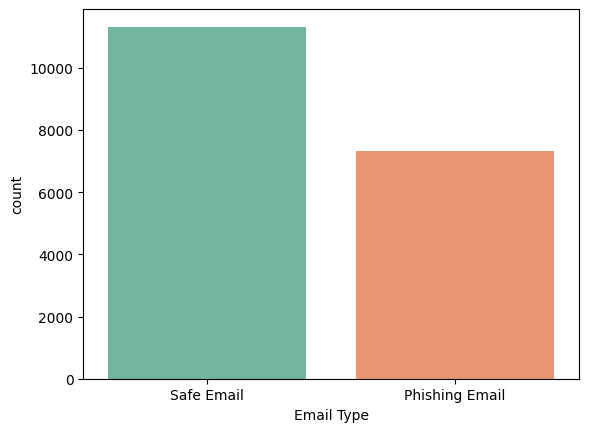

In [10]:
sns.countplot(data=data,x='Email Type', palette='Set2')

In [11]:
data['Email Type'].value_counts()

Email Type
Safe Email        11322
Phishing Email     7328
Name: count, dtype: int64

In [12]:
data.shape[0]

18650

In [13]:
Safe_Email = data[data["Email Type"]== "Safe Email"]
Phishing_Email = data[data["Email Type"]== "Phishing Email"]
Safe_Email = Safe_Email.sample(Phishing_Email.shape[0])

In [14]:
emaild= pd.concat([Safe_Email, Phishing_Email], ignore_index = True)
emaild.head()

,Unnamed: 0,Email Text,Email Type
0,3012,Damien Morton quoted:\n>W3C approves HTML 4 'e...,Safe Email
1,14810,Message Boards DispatchMessages\n All CNET\n T...,Safe Email
2,9671,BTW Ken Shan suggested making a set of corpus ...,Safe Email
3,12970,URL: http://diveintomark.org/archives/2002/10/...,Safe Email
4,8843,John Gay wrote:\n> looking into these things. ...,Safe Email


In [15]:

import re


def clean_body(text):
    if not isinstance(text, str):
        return ""
    # on enlève les espaces en trop au début/fin
    t = text.strip()
    # optionnel : remplacer multiples espaces par un seul
    t = re.sub(r"\s+", " ", t)
    return t

data["body"] = data["Email Text"].apply(clean_body)

# 2) Détection RE: / FWD: au début du mail

def detect_reply(text):
    if not isinstance(text, str):
        return 0
    first_part = text.lstrip()  # enlever éventuels espaces / \n au début
    return int(bool(re.match(r"^re\s*:", first_part, flags=re.IGNORECASE)))

def detect_forward(text):
    if not isinstance(text, str):
        return 0
    first_part = text.lstrip()
    return int(bool(re.match(r"^(fw|fwd)\s*:", first_part, flags=re.IGNORECASE)))

data["is_reply"] = data["body"].apply(detect_reply)
data["is_forward"] = data["body"].apply(detect_forward)

# 3) Features structurelles simples

data["body_length"] = data["body"].str.len()
data["num_words"] = data["body"].apply(lambda x: len(x.split()))
data["num_unique_words"] = data["body"].apply(lambda x: len(set(x.split())))

data["ratio_uppercase"] = data["body"].apply(
    lambda x: sum(1 for c in x if c.isupper()) / len(x) if len(x) > 0 else 0
)

data["num_special_chars"] = data["body"].apply(
    lambda x: len(re.findall(r"[^a-zA-Z0-9\s]", x))
)

In [16]:
url_pattern = r"(https?://[^\s]+)"

data["has_link"] = data["body"].str.contains(url_pattern, regex=True).astype(int)
data["num_links"] = data["body"].apply(lambda x: len(re.findall(url_pattern, x)))

data["has_shortened_link"] = data["body"].str.contains(
    r"(bit\.ly|tinyurl|goo\.gl|t\.co)", regex=True
).astype(int)

data["has_ip_link"] = data["body"].str.contains(
    r"https?://\d{1,3}(\.\d{1,3}){3}", regex=True
).astype(int)

# 5) Pièces jointes (approximation via texte)

attachment_regex = r"(attachment|attached|file|document|invoice|pdf|zip|rar|exe|js|dll|scr)"
data["has_attachment"] = data["body"].str.contains(attachment_regex, flags=re.IGNORECASE).astype(int)

attachment_ext_regex = r"\.(pdf|zip|rar|7z|exe|js|dll|scr|bat)"
data["num_attachments"] = data["body"].apply(
    lambda x: len(re.findall(attachment_ext_regex, x, flags=re.IGNORECASE))
)

suspicious_regex = r"\.(exe|zip|rar|js|dll|scr|bat)"
data["suspicious_attachment"] = data["body"].str.contains(suspicious_regex, flags=re.IGNORECASE).astype(int)


C:\Users\romai\AppData\Local\Temp\ipykernel_31088\833205964.py:3: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  data["has_link"] = data["body"].str.contains(url_pattern, regex=True).astype(int)
C:\Users\romai\AppData\Local\Temp\ipykernel_31088\833205964.py:6: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  data["has_shortened_link"] = data["body"].str.contains(
C:\Users\romai\AppData\Local\Temp\ipykernel_31088\833205964.py:10: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  data["has_ip_link"] = data["body"].str.contains(
C:\Users\romai\AppData\Local\Temp\ipykernel_31088\833205964.py:17: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  data["h

In [17]:
# 6) Mots-clés typiques de phishing

keywords = {
    "urgent": r"\burgent\b",
    "verify": r"\bverify|verification\b",
    "password": r"\bpassword\b",
    "bank": r"\bbank|account\b",
    "click": r"\bclick\b",
    "free": r"\bfree\b",
    "win": r"\bwin|winner\b",
    "invoice": r"\binvoice\b",
}

for name, pattern in keywords.items():
    data[f"kw_{name}"] = data["body"].str.contains(
        pattern, flags=re.IGNORECASE, regex=True
    ).astype(int)

In [18]:
# 7) Supprimer les colonnes inutiles
if "Unnamed: 0" in data.columns:
    data = data.drop(columns=["Unnamed: 0"])

In [19]:
data['Email Type']=data['Email Type'].map({'Safe Email':0,'Phishing Email':1})
data['Email Type']

0        0
1        0
2        0
3        1
4        1
        ..
18645    1
18646    0
18647    0
18648    0
18649    1
Name: Email Type, Length: 18650, dtype: int64

In [20]:
data

,Email Text,Email Type,body,is_reply,is_forward,body_length,num_words,num_unique_words,ratio_uppercase,num_special_chars,...,num_attachments,suspicious_attachment,kw_urgent,kw_verify,kw_password,kw_bank,kw_click,kw_free,kw_win,kw_invoice
0,"re : 6 . 1100 , disc : uniformitarianism , re ...",0,"re : 6 . 1100 , disc : uniformitarianism , re ...",1,0,1030,230,120,0.0000,61,...,0,0,0,0,0,0,0,0,0,0
1,the other side of * galicismos * * galicismo *...,0,the other side of * galicismos * * galicismo *...,0,0,479,91,60,0.0000,18,...,0,0,0,0,0,0,0,0,0,0
2,re : equistar deal tickets are you still avail...,0,re : equistar deal tickets are you still avail...,1,0,1245,305,111,0.0000,96,...,0,0,0,0,0,0,0,0,0,0
3,\nHello I am your hot lil horny toy.\n I am...,1,Hello I am your hot lil horny toy. I am the on...,0,0,623,96,79,0.0626,112,...,0,0,0,0,0,0,0,1,0,0
4,software at incredibly low prices ( 86 % lower...,1,software at incredibly low prices ( 86 % lower...,0,0,441,91,65,0.0000,27,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18645,date a lonely housewife always wanted to date ...,1,date a lonely housewife always wanted to date ...,0,0,237,45,34,0.0000,9,...,0,0,0,0,0,0,0,0,0,0
18646,request submitted : access request for anita ....,0,request submitted : access request for anita ....,0,0,477,99,60,0.0000,31,...,0,0,0,0,0,0,1,0,0,0
18647,"re : important - prc mtg hi dorn & john , as y...",0,"re : important - prc mtg hi dorn & john , as y...",1,0,1214,253,146,0.0000,40,...,0,0,0,0,0,0,0,0,0,0
18648,press clippings - letter on californian utilit...,0,press clippings - letter on californian utilit...,0,0,213,34,30,0.0000,8,...,0,0,0,0,0,0,0,0,0,0


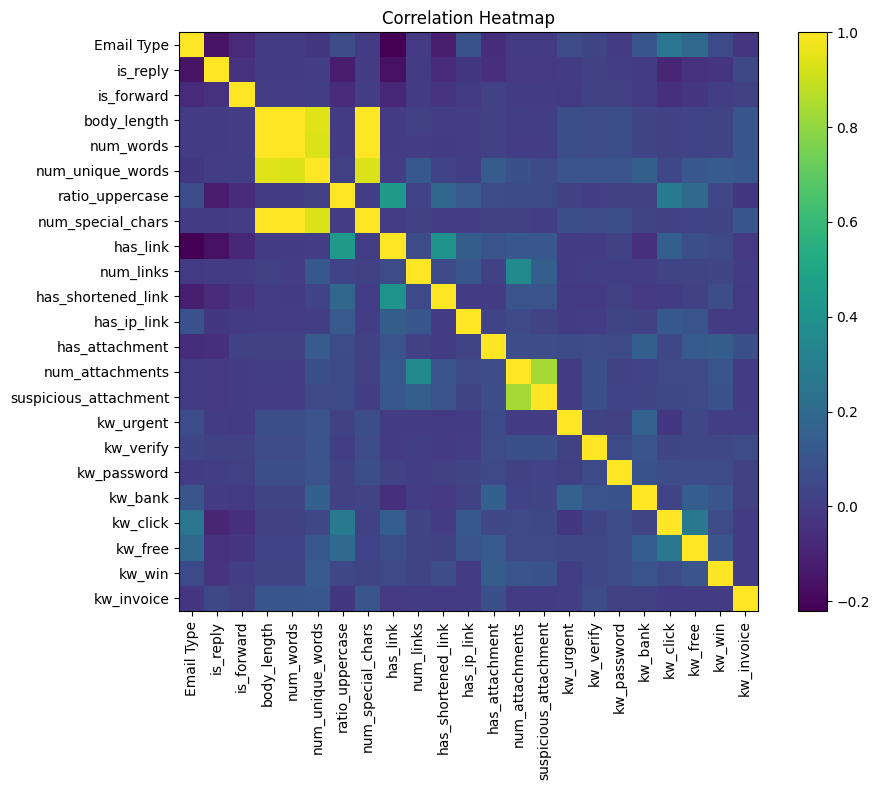

In [21]:
import matplotlib.pyplot as plt
import numpy as np

# Sélection auto des colonnes numériques
num_cols = data.select_dtypes(include=["int64", "float64"]).columns
num_cols = [c for c in num_cols if c != "Label"]

corr = data[num_cols].corr()

plt.figure(figsize=(10, 8))
plt.imshow(corr, interpolation='nearest')
plt.title("Correlation Heatmap")
plt.xticks(range(len(num_cols)), num_cols, rotation=90)
plt.yticks(range(len(num_cols)), num_cols)
plt.colorbar()
plt.tight_layout()
plt.show()


In [22]:
print(data.columns)

Index(['Email Text', 'Email Type', 'body', 'is_reply', 'is_forward',
       'body_length', 'num_words', 'num_unique_words', 'ratio_uppercase',
       'num_special_chars', 'has_link', 'num_links', 'has_shortened_link',
       'has_ip_link', 'has_attachment', 'num_attachments',
       'suspicious_attachment', 'kw_urgent', 'kw_verify', 'kw_password',
       'kw_bank', 'kw_click', 'kw_free', 'kw_win', 'kw_invoice'],
      dtype='object')


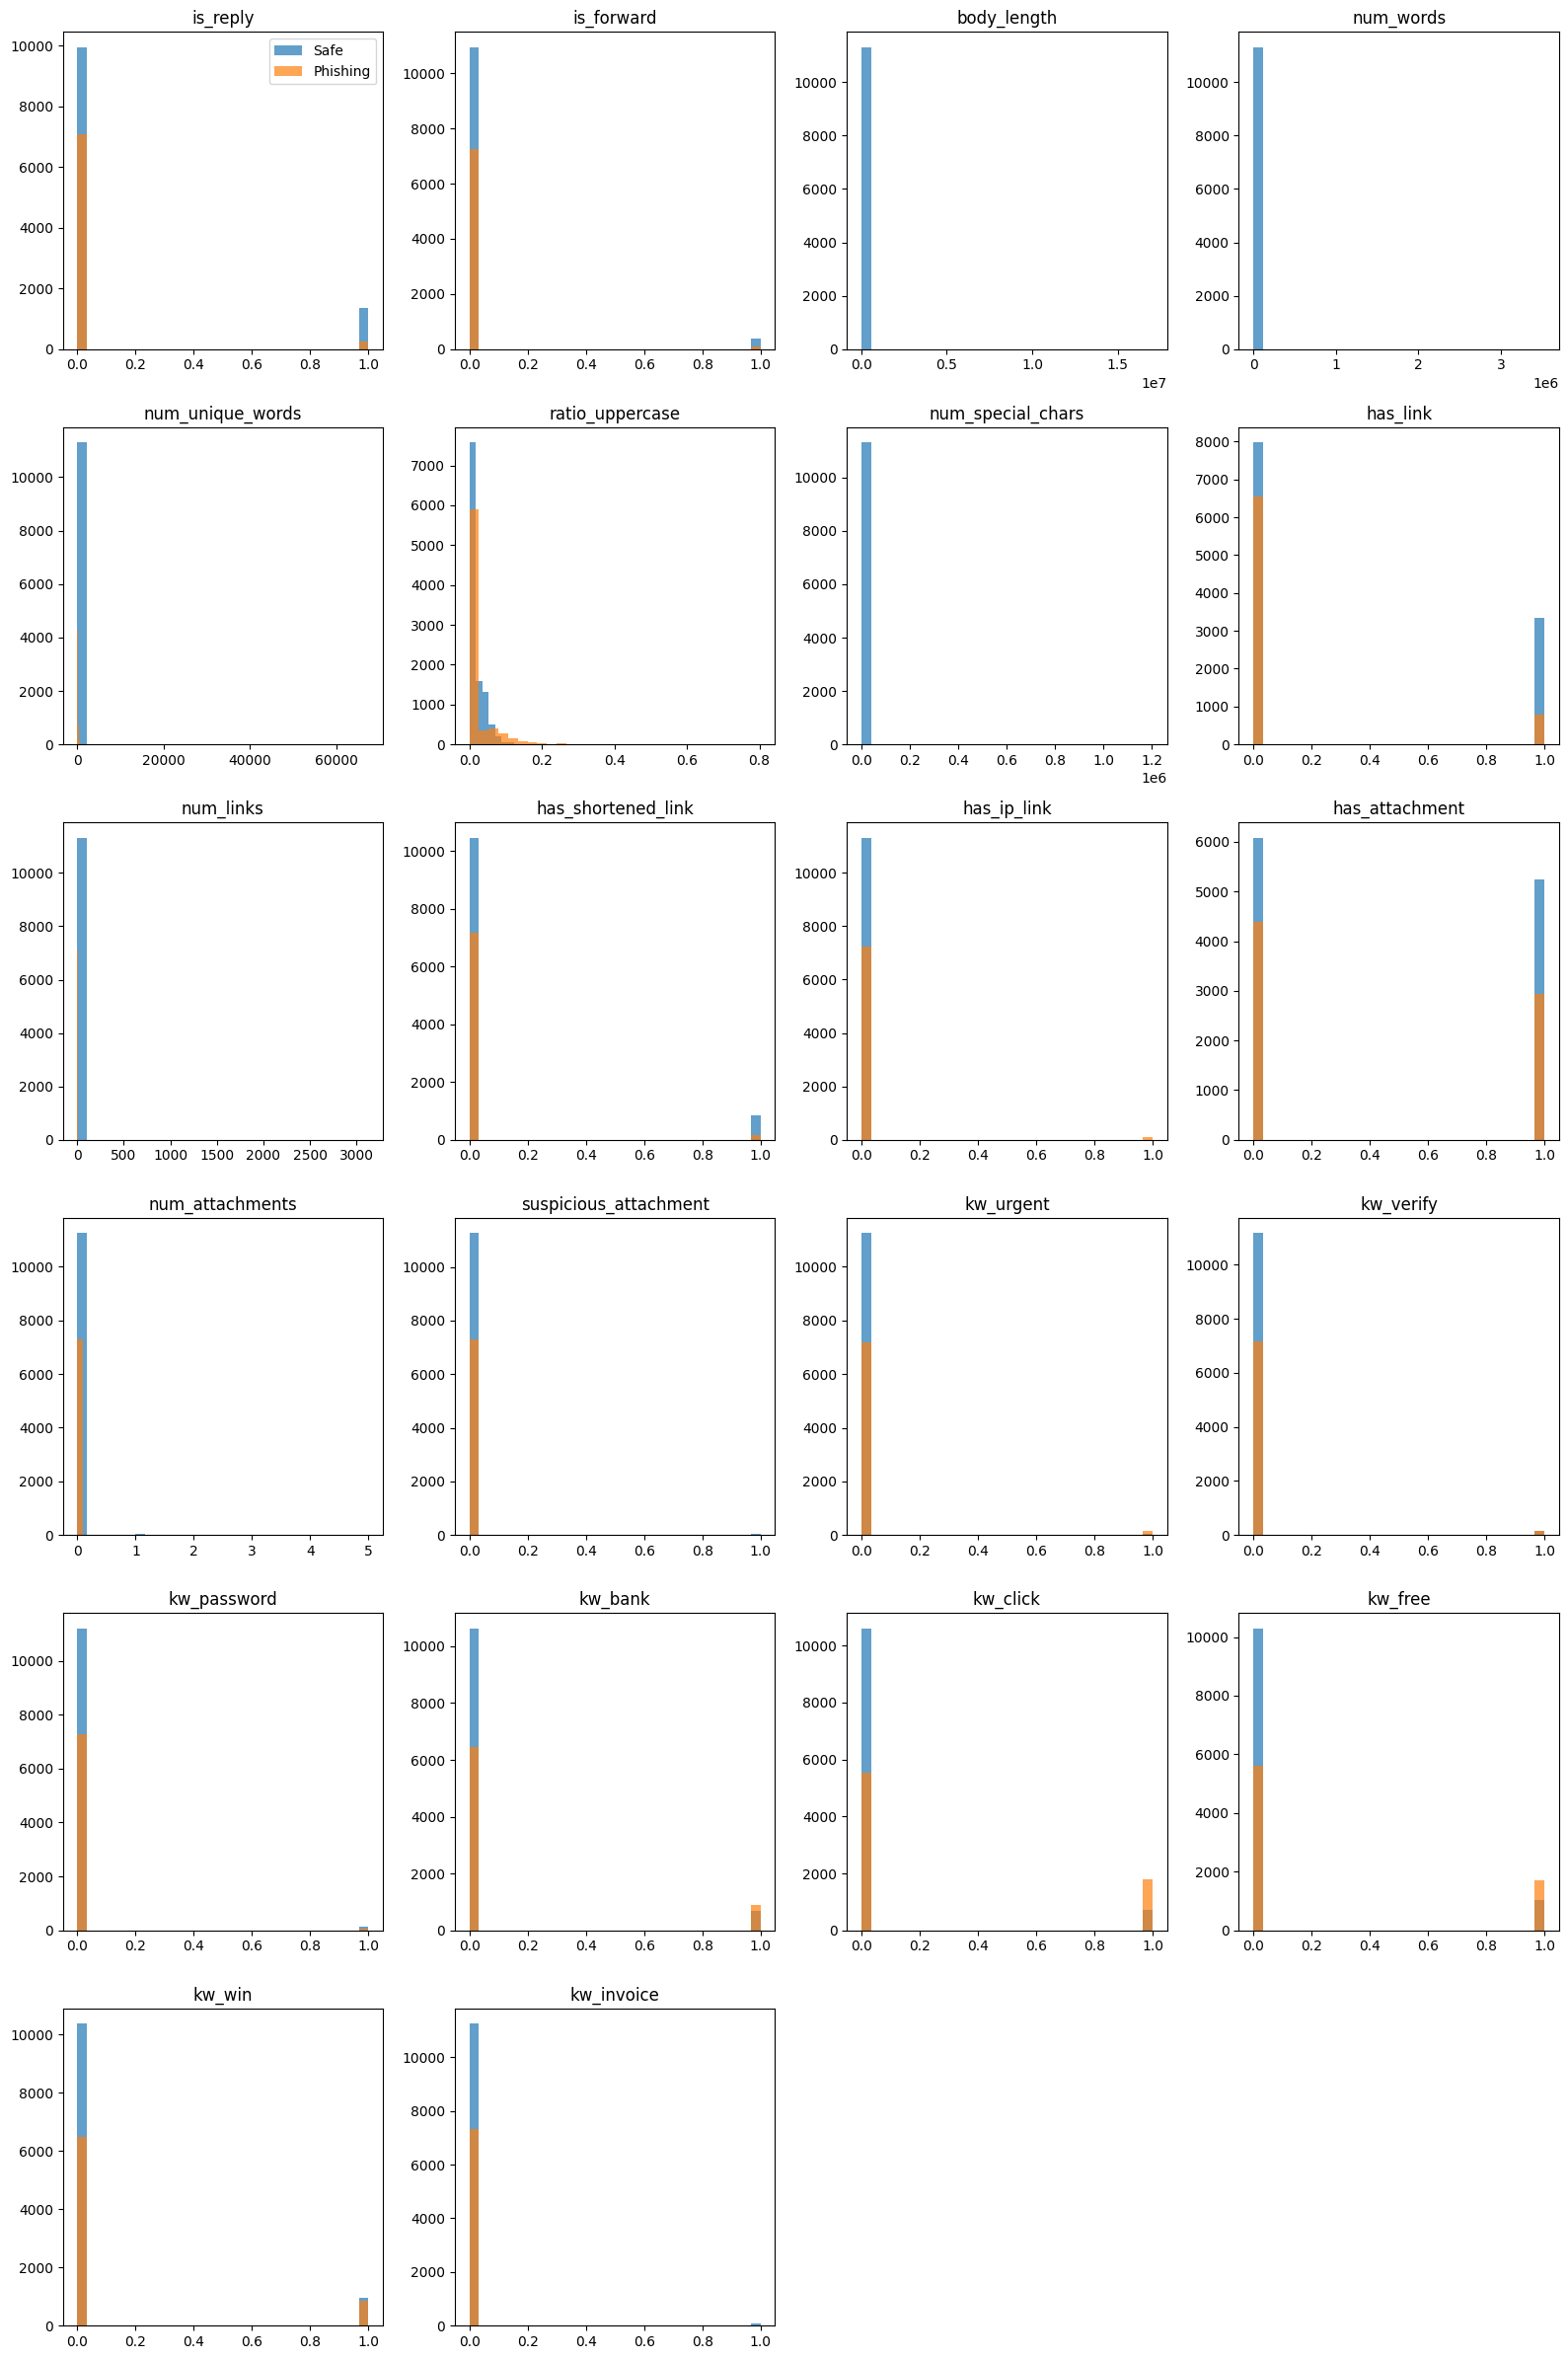

In [23]:
import matplotlib.pyplot as plt
import math

TARGET = "Email Type"

num_cols = data.select_dtypes(include=["int64", "float64"]).columns
num_cols = [c for c in num_cols if c != TARGET]

n = len(num_cols)
cols = 4
rows = math.ceil(n / cols)

plt.figure(figsize=(4*cols, 4*rows))

for i, col in enumerate(num_cols, 1):
    plt.subplot(rows, cols, i)
    plt.hist(data[data[TARGET] == 0][col], bins=30, alpha=0.7, label="Safe")
    plt.hist(data[data[TARGET] == 1][col], bins=30, alpha=0.7, label="Phishing")
    plt.title(col)
    plt.xlabel("")
    plt.ylabel("")
    if i == 1:  # éviter d'écrire la légende partout
        plt.legend()

plt.tight_layout()
plt.show()


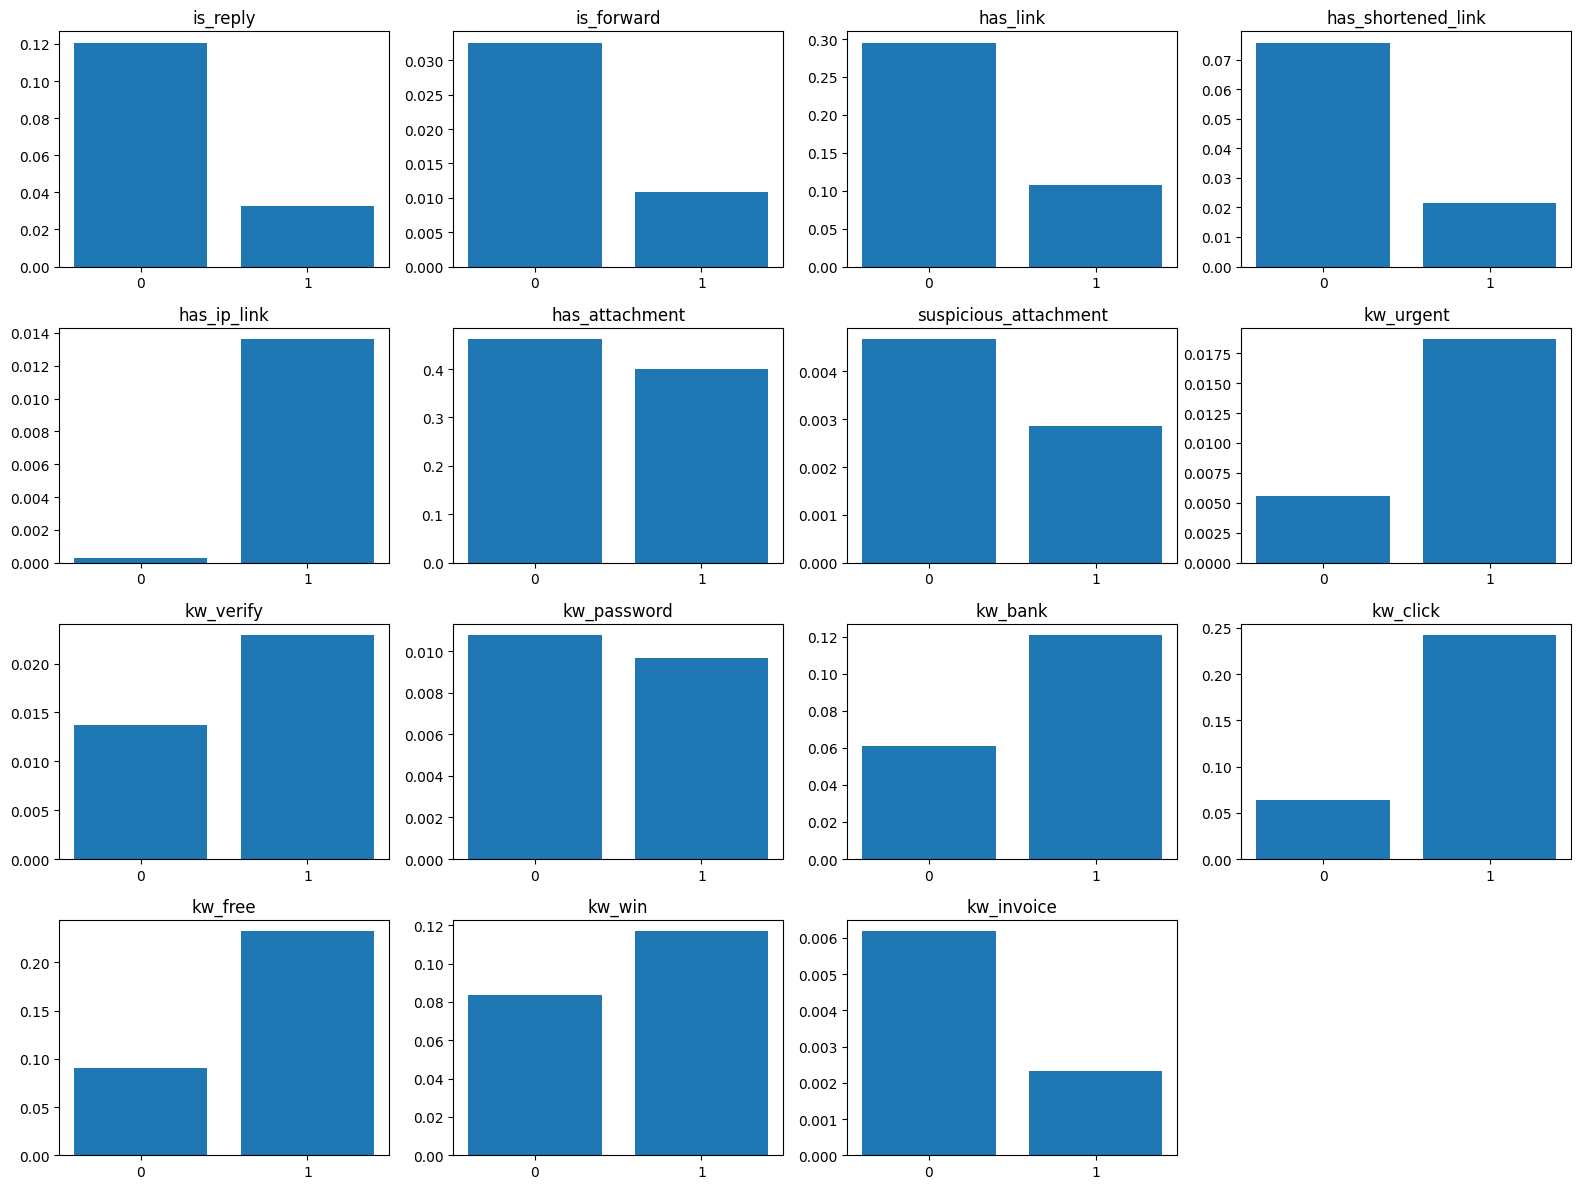

In [24]:
import matplotlib.pyplot as plt
import math

TARGET = "Email Type"

# Auto-détection des colonnes binaires (0/1)
binary_cols = [
    c for c in data.columns 
    if data[c].dtype in ["int64", "int32"] 
    and set(data[c].unique()).issubset({0,1})
    and c != TARGET
]

n = len(binary_cols)
cols = 4
rows = math.ceil(n / cols)

plt.figure(figsize=(4*cols, 3*rows))

for i, col in enumerate(binary_cols, 1):
    plt.subplot(rows, cols, i)
    vals = data.groupby(TARGET)[col].mean()
    plt.bar(vals.index.astype(str), vals.values)
    plt.title(col)
    plt.xlabel("")
    plt.ylabel("")

plt.tight_layout()
plt.show()


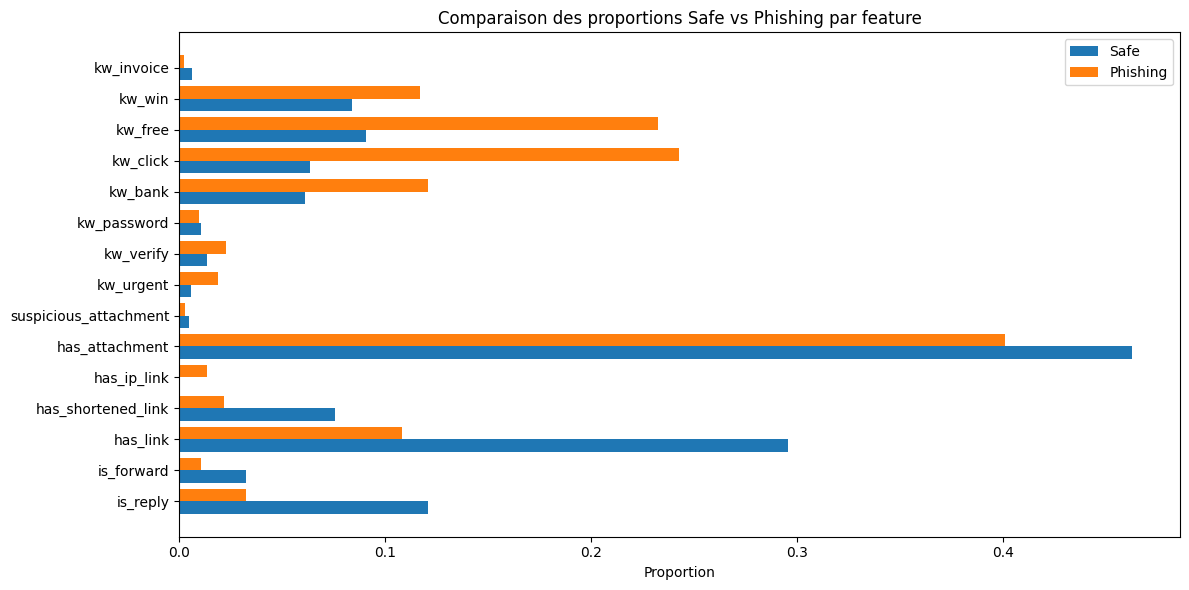

In [25]:
import matplotlib.pyplot as plt
import pandas as pd

TARGET = "Email Type"

binary_cols = [c for c in data.columns 
               if data[c].nunique() == 2 and c != TARGET]

plt.figure(figsize=(12, len(binary_cols)*0.4))

safe_color = "#1f77b4"      # bleu matplotlib
phish_color = "#ff7f0e"     # orange matplotlib

safe = data[data[TARGET] == 0]
phishing = data[data[TARGET] == 1]

for i, col in enumerate(binary_cols):
    safe_rate = safe[col].mean()
    phish_rate = phishing[col].mean()

    plt.barh(i - 0.2, safe_rate, height=0.4, color=safe_color, label="Safe" if i == 0 else "")
    plt.barh(i + 0.2, phish_rate, height=0.4, color=phish_color, label="Phishing" if i == 0 else "")

plt.yticks(range(len(binary_cols)), binary_cols)
plt.xlabel("Proportion")
plt.title("Comparaison des proportions Safe vs Phishing par feature")
plt.legend()
plt.tight_layout()
plt.show()


In [26]:

threshold = 0.90   # seuil de corrélation
corr_matrix = data[num_cols].corr().abs()

# On ne garde que la moitié supérieure (pour éviter doublons)
upper = np.triu(corr_matrix, k=1)

cols_to_drop = []

for i in range(len(num_cols)):
    for j in range(i+1, len(num_cols)):
        if upper[i, j] > threshold:
            col1 = num_cols[i]
            col2 = num_cols[j]

            # On garde la colonne avec le moins de valeurs nulles (ou arbitrary otherwise)
            keep = col1 if data[col1].isna().sum() < data[col2].isna().sum() else col2
            drop = col2 if keep == col1 else col1

            cols_to_drop.append(drop)

cols_to_drop = list(set(cols_to_drop))  # unique

print("Colonnes à supprimer pour haute corrélation :", cols_to_drop)

# Drop réel
data = data.drop(columns=cols_to_drop)

Colonnes à supprimer pour haute corrélation : ['num_words', 'body_length', 'num_unique_words']


In [27]:
data

,Email Text,Email Type,body,is_reply,is_forward,ratio_uppercase,num_special_chars,has_link,num_links,has_shortened_link,...,num_attachments,suspicious_attachment,kw_urgent,kw_verify,kw_password,kw_bank,kw_click,kw_free,kw_win,kw_invoice
0,"re : 6 . 1100 , disc : uniformitarianism , re ...",0,"re : 6 . 1100 , disc : uniformitarianism , re ...",1,0,0.0000,61,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,the other side of * galicismos * * galicismo *...,0,the other side of * galicismos * * galicismo *...,0,0,0.0000,18,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,re : equistar deal tickets are you still avail...,0,re : equistar deal tickets are you still avail...,1,0,0.0000,96,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,\nHello I am your hot lil horny toy.\n I am...,1,Hello I am your hot lil horny toy. I am the on...,0,0,0.0626,112,1,1,0,...,0,0,0,0,0,0,0,1,0,0
4,software at incredibly low prices ( 86 % lower...,1,software at incredibly low prices ( 86 % lower...,0,0,0.0000,27,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18645,date a lonely housewife always wanted to date ...,1,date a lonely housewife always wanted to date ...,0,0,0.0000,9,0,0,0,...,0,0,0,0,0,0,0,0,0,0
18646,request submitted : access request for anita ....,0,request submitted : access request for anita ....,0,0,0.0000,31,0,0,0,...,0,0,0,0,0,0,1,0,0,0
18647,"re : important - prc mtg hi dorn & john , as y...",0,"re : important - prc mtg hi dorn & john , as y...",1,0,0.0000,40,0,0,0,...,0,0,0,0,0,0,0,0,0,0
18648,press clippings - letter on californian utilit...,0,press clippings - letter on californian utilit...,0,0,0.0000,8,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [28]:
data.to_csv('../../csv/PreprocessedData.csv', index=False)